In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import csv

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Summary

Here we try to find the patterns between the donors who only donated once <b>(Uni-donors)</b> and donors who donated multiple times <b>(Multi-donors)</b>. <br>
We try to analyse each relevant property that is available in the Leuven University Fund (LUF) database and check if there are features that Multi-donors favour. <br>

The data which we use for this task is from the file 'question2_prepared_data.csv' which is generated using Python. This data is the prepared data for building a classifier that predicts if a donor is a Uni-donor or a Multi-donor. <br>

We draw many bar charts using the pivot tables of each feature. <br>
The target used is called <b>IS_MULTI_DONOR</b> and the value of this feature is 1 if the donor is a Multi-donor, 0 if the donor is a Uni-donor. <br>

The main feature properties which we will analyse in this notebook are: <br>
-  <b>PARTNER Roles</b>: This property indicates what role a donor (PARTNER) carries out in the LUF database. The roles can be weather the donor is an alumni, contact person etc. Information about Roles can be found in 'Roles.ipynb'. <br> 
Features used: All Role ID's
-  <b>Person/Organization</b>: This property indicates if the donor is a person or an organization. <br>
Feature used: ISK_PERSON
-  <b>Sex</b>: This property indicates the sex of the donor. If the donor is an organization then this value is empty. <br>
Features used: XSEXF & XSEXM
-  <b>Province of donation</b>: This property indicates from which province of Belgium the donation is made. <br>
Features used: 11 features in the format ISK_PRO_x. x is the province id, eg: x = AWP indicates Antwerp Province
-  <b>Method of Communication</b>: This property indicates from which mode LUF communicates with donors. <br>
Features used: LET (Letter), INT (Internet) from ADRC table
-  <b>Country of donation</b>: This property indicates from which country the donor resides. <br>
Features used: Country codes. Eg: NL - Netherlands
-  <b>Nationality</b>: This property indicates the nationality of the donor. <br> 
Features used: Country codes. Eg: NL - Netherlands
-  <b>Is Firstname known</b>: This property indicates if the firstname of the donor is known to LUF. <br>
Feature used: ISK_VOORNAAM
- <b>Correspondance Language</b>: This property indicates the language used by LUF to communicate with the donors. <br>
Features used: E (English), F (French), N (Dutch) from BUT000 table

The below properties are specific at the time of first donation, in case of Multi-donors. <br>

-  <b>Age Category at the time of First Donation</b>: This property indicates at what age range the donor was in when he/she made their first donation. <br>
Features used: ISK_AGE_FD_CAT1, ISK_AGE_FD_CAT2, ISK_AGE_FD_CAT3, ISK_AGE_FD_CAT4, & ISK_AGE_FD_CATU
-  <b>Donation Category of First Donation</b>: This property indicates at what donation category was the donor's first donation. CAT 1: € 0 – 1.249, CAT 2: € 1.250 – 4.999, CAT 3: € 5.000 – 14.999, CAT 4: € 15.000 – 24.999, CAT 5: € 25.000 – 49.999, CAT 6: > € 50.000. <br>
Features used: ISK_FD_CAT_1, ISK_FD_CAT_2, ISK_FD_CAT_3, ISK_FD_CAT_4, ISK_FD_CAT_5, ISK_FD_CAT_6
-  <b>Number of days of sending thank you letter</b>: This property indicates how long LUF take to send a thank you letter after receiving the first donation of the donors. <br>
Feature used: NUM_D_TYL
-  <b>Is first donation shared or not</b>: This property indicates if the first donation of a donor (donor 1) was shared with another donor (donor 2) or not. <br>
Feature used: ISK_FD_SHARED
-  <b>Gift category of first donation</b>: This property indicates if the first donation of a donor was a Fund, Chairs or Other Credits. <br>
Features used: ISK_CC_FD_F, ISK_CC_FD_CH, ISK_CC_FD_OC
-  <b>Year of first donation</b>: This property indicates the year of first donation of a donor. <br>
Feature used: ZLUF_DOCDATE
-  <b>Month of first donation</b>: This property indicates the calender month of first donation of a donor. <br>
Feature used: ZLUF_DOCDATE
-  <b>Weekday of first donation</b>: This property indicates the weekday of first donation of a donor. <br>
Feature used: ZLUF_DOCDATE
-  <b>Availability of VGS</b>: This property indicates if a donor provided any structured information while donating to LUF. <br>
Feature used: ISK_FD_VGS
-  <b>Availability of bank account number</b>: This property indicates if LUF knows the bank account of the donor. <br>
Feature used: ISK_FD_BANKN
-  <b>Tax Eligibility</b>: This property indicates if the credit to which the donor made his first donation to LUF is eligible for a tax benefit or not. <br>
Feature used: ISK_FD_TAX_NE
-  <b>Is Thank You Letter Needed</b>: This property indicates if a thank you letter should be sent to the donor after their donation or not. <br>
Feature used: ISK_FD_TYL_NN

The below properties are about the known relationship between donors. <br>

-  <b>Partner Relationship</b>: This property indicates checks how many partner relations with other donors, the given donor is involved in. <br>
Feature used: REL_BUR998
-  <b>Partner member of Alumni Circle</b>: This property checks how many alumni circles the given donor is involved in. <br>
Feature used: REL_Z00001
-  <b>Contact Person of an Organization</b>: This property checks how many organizations that donates to LUF the given donor acts as a contact person with. <br>
Feature used: REL_ORGCP
-  <b>Parent-Child Relationship</b>: This property checks how many children the given donor has. The children should also be in LUF database as a business partner. <br>
Feature used: REL_BUR021
-  <b>Brother/Sister Relationship</b>: This property checks how many siblings the given donor has. The siblings should also be in LUF database as a business partner. <br>
-  <b>Responsible Employee</b>: The property checks if the donor is a responsible employee. <br>
Feature used: REL_BUR011

The below properties are about the known marketing attributes about donors. <br>

-  <b>Official Title</b>: This property is about the official title of donors like Doctor, Notary etc. <br>
Feature used: ZLUF_AMBT
-  <b>Church Title</b>: This property is about the titles of donors in Church like Priest, Father etc. <br>
Feature used: ZLUF_KERKELIJK
-  <b>Interest bequest</b>: This property indicates how the donor showed interes in donating to LUF. <br>
Feature used: ZLUF_INTERESSELEGAAT
-  <b>Association type</b>: This property indicates the association type of the donor organizations. <br>
Feature used: ZLUF_ORG_VERENIGING
-  <b>Consider company as a person</b><br>
Feature used: ZLUF_ORG_ALS_PERSOON
-  <b>Interest to indicate</b>: This property shows to which cause the donor is interested in donating. <br>
Feature used: ZLUF_SCHENKINTERESSE
-  <b>Belongs to list</b>: This property shows if a donor belongs to a LUF defined list such as KU Leuven council, Academy board etc. <br>
Feature used: ZLUF_LIJST
-  <b>Campaign</b>: This property indicates if a donor was signed up during one of the campaign of LUF. <br>
Feature used: ZLUF_CAMPAGNE

In [3]:
feature_data = pd.read_csv('SQLDATA/PYTHON_OUTPUTS/question2_prepared_data.csv')
feature_data = feature_data.drop(['Unnamed: 0'], axis=1)
print(feature_data.shape)
feature_data.head()

(56897, 150)


,PARTNER,XSEXF,XSEXM,ZZAMNT_PAYED,ZLUF_DOCDATE,ZZAMNT_PAYED_NORM,ISK_PERSON,ISK_BIRTHPL,ISK_BU_LANGU,ISK_CNT_ORIGIN,...,ZLUF_LIJST,ZLUF_ORG_ALS_PERSOON,ZLUF_ORG_VERENIGING,ZLUF_SCHENKINTERESSE_ARTnCULTURE,ZLUF_SCHENKINTERESSE_CHILDREN,ZLUF_SCHENKINTERESSE_DEVCOOP,ZLUF_SCHENKINTERESSE_HEALTHCARE,ZLUF_SCHENKINTERESSE_HERITAGE,ZLUF_SCHENKINTERESSE_SCHOLARSHIPS,IS_MULTI_DONOR
0,200000002,0,0,1000.0,2004-07-20,1000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,200000007,0,0,4000.0,2010-11-02,4000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,200000010,0,0,100.0,2009-12-22,100.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,200000013,0,0,5000.0,2012-02-28,5000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,200000024,0,0,20000.0,2018-01-03,20000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
feature_data['IS_MULTI_DONOR'].sum()

14729

There are 14729 (~26%) multi-donors out of 56897 donors

### PARTNER Roles

(177894, 2)
(137023, 3)
56897
Z00017 - LUF Contact                  56897
ZDONOR - Donor                        56326
Z00001 - Alumnus                      10589
ZKBOO - KBO Company                    5444
Z00003 - Non-Active Employee           2700
BUP003 - HR Registration               1832
Z00004 - Friend of Alumni               905
Z00018 - Emeritus                       490
ZOVERL - Deceased                       465
Z00019 - VIP Contact Database           420
Z00002 - Student                        388
Z00013 - Future Student                 349
ZSCHTE - Donor / Testator                51
ZKLRD - LRD Business Partner             39
Z00020 - Pangea Contact                  37
Z00016 - IO Contact                      18
ZPROSP - Prospect                        17
ZKBOV - KBO Establishment Unit           13
ZSTOPG - Closed down                     13
ZERFL2 - Donor / Deceased Testator       10
ZERFLA - Deceased Testator                9
Z00005 - Circle                           9
ZS

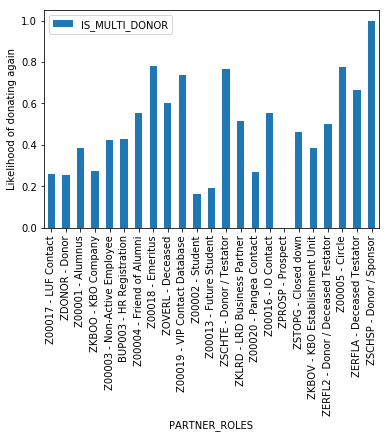

In [5]:
but100 = pd.read_csv('sqldata/20190102_BUT100.csv',dtype = str, encoding='latin-1',sep=';')
print(but100.shape)
df = feature_data[['PARTNER','IS_MULTI_DONOR']]
but100['PARTNER'] = but100['PARTNER'].astype(int)
df = pd.merge(df,but100,on='PARTNER',how='inner')
print(df.shape) #PARTNER play different roles, that's why there are 137023 entries
print(len(set(df['PARTNER'])))
df['PARTNER_ROLES'] = df['RLTYP'].replace('Z00017','Z00017 - LUF Contact').replace('ZDONOR','ZDONOR - Donor').replace(
    'Z00001','Z00001 - Alumnus').replace('ZKBOO','ZKBOO - KBO Company').replace(
    'Z00003','Z00003 - Non-Active Employee').replace('BUP003','BUP003 - HR Registration').replace(
    'Z00004','Z00004 - Friend of Alumni').replace('Z00018','Z00018 - Emeritus').replace('ZOVERL','ZOVERL - Deceased').replace(
    'Z00019','Z00019 - VIP Contact Database').replace('Z00002','Z00002 - Student').replace(
    'Z00013','Z00013 - Future Student').replace('ZSCHTE','ZSCHTE - Donor / Testator').replace(
    'ZKLRD','ZKLRD - LRD Business Partner').replace('Z00020','Z00020 - Pangea Contact').replace(
    'Z00016','Z00016 - IO Contact').replace('ZPROSP','ZPROSP - Prospect').replace('ZSTOPG','ZSTOPG - Closed down').replace(
    'ZKBOV','ZKBOV - KBO Establishment Unit').replace('ZERFL2','ZERFL2 - Donor / Deceased Testator').replace(
    'Z00005','Z00005 - Circle').replace('ZERFLA','ZERFLA - Deceased Testator').replace('ZSCHSP','ZSCHSP - Donor / Sponsor')
print(df['PARTNER_ROLES'].value_counts())
per_org_pivot = df.pivot_table(index="PARTNER_ROLES",values="IS_MULTI_DONOR")
per_org_pivot = per_org_pivot.reindex(['Z00017 - LUF Contact','ZDONOR - Donor','Z00001 - Alumnus','ZKBOO - KBO Company',
                                       'Z00003 - Non-Active Employee','BUP003 - HR Registration','Z00004 - Friend of Alumni',
                                       'Z00018 - Emeritus','ZOVERL - Deceased','Z00019 - VIP Contact Database',
                                       'Z00002 - Student','Z00013 - Future Student','ZSCHTE - Donor / Testator',
                                       'ZKLRD - LRD Business Partner','Z00020 - Pangea Contact','Z00016 - IO Contact',
                                       'ZPROSP - Prospect','ZSTOPG - Closed down','ZKBOV - KBO Establishment Unit',
                                       'ZERFL2 - Donor / Deceased Testator','Z00005 - Circle','ZERFLA - Deceased Testator',
                                       'ZSCHSP - Donor / Sponsor'])
per_org_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

If a donor is a Friend of an <b>Alumni</b>, <b>Emeritus</b>, or an <b>IO Contact</b>, then it is a good chance that this donor would donate again.

### Person/Organization

Person          50105
Organization     6792
Name: PERSON/ORG, dtype: int64


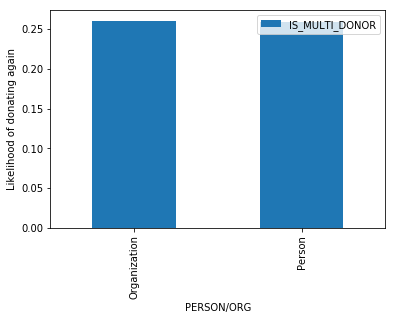

In [6]:
df = feature_data[['PARTNER','ISK_PERSON','IS_MULTI_DONOR']]
df['ISK_PERSON'] = df['ISK_PERSON'].astype(str)
df['ISK_PERSON'] = df['ISK_PERSON'].replace('1','Person').replace('0','Organization')
df['PERSON/ORG'] = df['ISK_PERSON']
print(df['PERSON/ORG'].value_counts())
per_org_pivot = df.pivot_table(index="PERSON/ORG",values="IS_MULTI_DONOR")
per_org_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

### Sex

Male       26135
Female     23766
unknown     6996
Name: SEX, dtype: int64


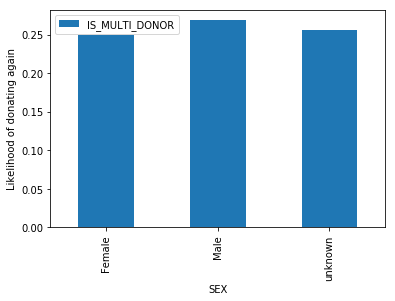

In [7]:
df = feature_data[['PARTNER','XSEXF','XSEXM','IS_MULTI_DONOR']]
df[['XSEXF','XSEXM']] = df[['XSEXF','XSEXM']].astype(str)
df['XSEXF'] = df['XSEXF'].replace('1','Female').replace('0','')
df['XSEXM'] = df['XSEXM'].replace('1','Male').replace('0','')
df['SEX'] = (df['XSEXF']+df['XSEXM']).replace('','unknown')
#df['SEX'] = df['SEX'].replace('','Unknown')
print(df['SEX'].value_counts())
#There are 6996 missing values for SEX. 6792 out of 6996 values is because of the fact that the PARTNER is an organization.
sex_pivot = df.pivot_table(index="SEX",values="IS_MULTI_DONOR")
sex_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

### Province of donation

Flemish Brabant    20025
Antwerp            12005
West Flanders       6968
East Flanders       6805
Limburg             6662
Brussels            1728
outside BE          1172
Waloon Brabant       569
Liege                407
Hainaut              268
Luxembourg           161
Namur                127
Name: PROVINCE, dtype: int64


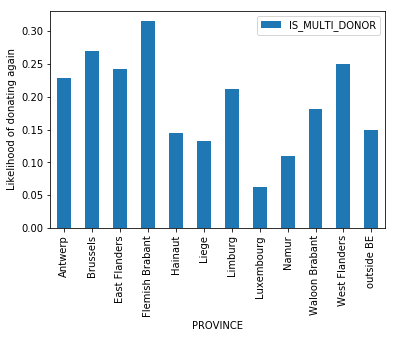

In [8]:
df = feature_data[['PARTNER','ISK_PRO_BCR','ISK_PRO_WB','ISK_PRO_FB','ISK_PRO_AWP','ISK_PRO_LBG','ISK_PRO_LGE','ISK_PRO_NMU',
                'ISK_PRO_HNT','ISK_PRO_LUX','ISK_PRO_WF','ISK_PRO_EF','IS_MULTI_DONOR']]
province_cols = ['ISK_PRO_BCR','ISK_PRO_WB','ISK_PRO_FB','ISK_PRO_AWP','ISK_PRO_LBG','ISK_PRO_LGE','ISK_PRO_NMU',
                 'ISK_PRO_HNT','ISK_PRO_LUX','ISK_PRO_WF','ISK_PRO_EF']
df[province_cols] = df[province_cols].astype(str)
df['ISK_PRO_BCR'] = df['ISK_PRO_BCR'].replace('1','Brussels').replace('0','')
df['ISK_PRO_WB'] = df['ISK_PRO_WB'].replace('1','Waloon Brabant').replace('0','')
df['ISK_PRO_FB'] = df['ISK_PRO_FB'].replace('1','Flemish Brabant').replace('0','')
df['ISK_PRO_AWP'] = df['ISK_PRO_AWP'].replace('1','Antwerp').replace('0','')
df['ISK_PRO_LBG'] = df['ISK_PRO_LBG'].replace('1','Limburg').replace('0','')
df['ISK_PRO_LGE'] = df['ISK_PRO_LGE'].replace('1','Liege').replace('0','')
df['ISK_PRO_NMU'] = df['ISK_PRO_NMU'].replace('1','Namur').replace('0','')
df['ISK_PRO_HNT'] = df['ISK_PRO_HNT'].replace('1','Hainaut').replace('0','')
df['ISK_PRO_LUX'] = df['ISK_PRO_LUX'].replace('1','Luxembourg').replace('0','')
df['ISK_PRO_WF'] = df['ISK_PRO_WF'].replace('1','West Flanders').replace('0','')
df['ISK_PRO_EF'] = df['ISK_PRO_EF'].replace('1','East Flanders').replace('0','')
df['PROVINCE'] = df[province_cols].sum(axis=1).replace('','outside BE')
print(df['PROVINCE'].value_counts())
be_province_pivot = df.pivot_table(index="PROVINCE",values="IS_MULTI_DONOR")
be_province_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

Not surprisingly, donors from <b>Flemsih Brabant</b> province are more likely to be Multi-donors than from other provinces of Belgium.

### Method of Communication

(66150, 2)
(66150, 4)
(66150, 5)
Letter      46459
Internet    10402
Unknown        36
Name: METHOD_OF_COMMUNICATION, dtype: int64


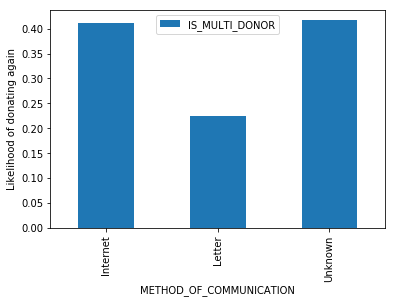

In [9]:
but020 = pd.read_csv('sqldata/20190102_BUT020.csv',dtype = str, encoding='latin-1',sep=';')
print(but020.shape)
adrc = pd.read_csv('sqldata/20190102_ADRC.csv',dtype = str, encoding='latin-1',sep=';')
print(adrc.shape)
df = feature_data[['PARTNER','IS_MULTI_DONOR']]
address = pd.merge(but020,adrc,on='ADDRNUMBER',how='inner')
address['PARTNER'] = address['PARTNER'].astype(int)
print(address.shape)
df = pd.merge(df,address,on='PARTNER',how='left')
df = df[['PARTNER','DEFLT_COMM','IS_MULTI_DONOR']]
df['METHOD_OF_COMMUNICATION'] = df['DEFLT_COMM'].replace('INT','Internet').replace('LET','Letter').fillna('Unknown')
print(df['METHOD_OF_COMMUNICATION'].value_counts())
comm_mode_pivot = df.pivot_table(index="METHOD_OF_COMMUNICATION",values="IS_MULTI_DONOR")
comm_mode_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

The donor is more likely to be a Multi-donor if LUF is communicating with the donor over the <b>Internet</b> than over the Letter.

### Country of donation

BE         55725
NL           509
others       175
DE           120
FR            89
LU            88
CH            78
US            52
GB            48
unknown       13
Name: COUNTRY_OF_DONATION, dtype: int64


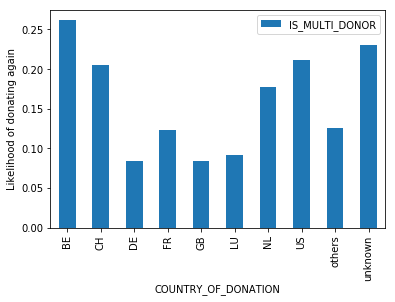

In [10]:
df = feature_data[['PARTNER','IS_MULTI_DONOR']]
df = pd.merge(df,address,on='PARTNER',how='left')
df = df[['PARTNER','COUNTRY','IS_MULTI_DONOR']]
low_don_countries = ['IT','AT','MC','ES','AU','HK','IE','RO','DK','RU','GR','SE','SG','PT','FI','ID','PL','TR','CA','LV','CN',
                     'HU','CY','BR','AM','MA','BH','OM','TH','GI','AE','PE','NO','KE','MX','NZ','BG','PA','LI','JP','VC','PH', 
                     'MY','MT','SI','CZ']
df['COUNTRY'] = df['COUNTRY'].replace(low_don_countries,'others').fillna('unknown')
df['COUNTRY_OF_DONATION'] = df['COUNTRY']
print(df['COUNTRY_OF_DONATION'].value_counts())
comm_mode_pivot = df.pivot_table(index="COUNTRY_OF_DONATION",values="IS_MULTI_DONOR")
comm_mode_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

This is an expected result.

### Nationality

unknown    45712
BE         10985
others        85
NL            83
DE            17
IT            15
Name: NATIONALITY, dtype: int64


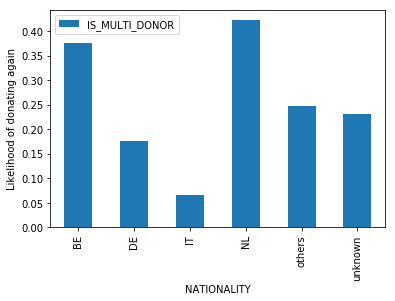

In [11]:
but000 = pd.read_csv('sqldata/20190102_BUT000.csv',dtype = str, encoding='latin-1',sep=';')
but000['PARTNER'] = but000['PARTNER'].astype(int)
df = feature_data[['PARTNER','IS_MULTI_DONOR']]
df = pd.merge(df,but000[['PARTNER','NATIO']],on='PARTNER',how='inner')
low_don_ori_countries = ['ID','IE','ES','TR','GR','NG','RO','EG','CH','CA','PH','KE','AT','RU','LU','LB','ZA','ET','BI','IQ',
                         'VN','IR','GH','BG','AR','UA','MA','CU','CL','PE','EE','BW','RS','FI','CG','AL','AM','TZ','XK','JO',
                         'JP','CD','MY','SR','CZ','UG','MX','SI','HU','EC','BJ','PK','US','PL','IN','GB','CN','FR']
df['NATIO'] = df['NATIO'].replace(low_don_ori_countries,'others').fillna('unknown')
df['NATIONALITY'] = df['NATIO']
print(df['NATIONALITY'].value_counts())
comm_mode_pivot = df.pivot_table(index="NATIONALITY",values="IS_MULTI_DONOR")
comm_mode_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

Interestingly, if the donor is from <b>Netherlands</b>, then the donor is slightly more likely to donate to LUF again than if the donor is from Belgium.

### Is Firstname known

Not-known    42947
Known        13950
Name: IS_FIRSTNAME_KNOWN, dtype: int64


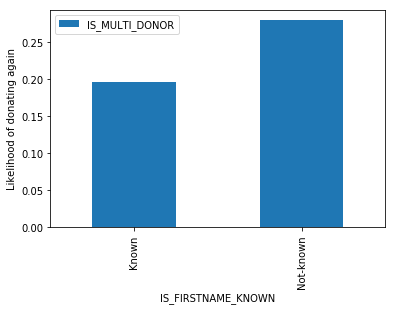

In [12]:
df = feature_data[['PARTNER','ISK_VOORNAAM','IS_MULTI_DONOR']]
df['ISK_VOORNAAM'] = df['ISK_VOORNAAM'].astype(str)
df['ISK_VOORNAAM'] = df['ISK_VOORNAAM'].replace('1','Known').replace('0','Not-known')
df['IS_FIRSTNAME_KNOWN'] = df['ISK_VOORNAAM']
print(df['IS_FIRSTNAME_KNOWN'].value_counts())
per_org_pivot = df.pivot_table(index="IS_FIRSTNAME_KNOWN",values="IS_MULTI_DONOR")
per_org_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

Interestingly, if we know the first name of the donor, then this donor is less likely to donate again than if we don't know the first name.

### Correspondance Language

Netherlands    49610
unknown         6794
French           247
English          246
Name: CORRESPONDANCE_LANGUAGE, dtype: int64


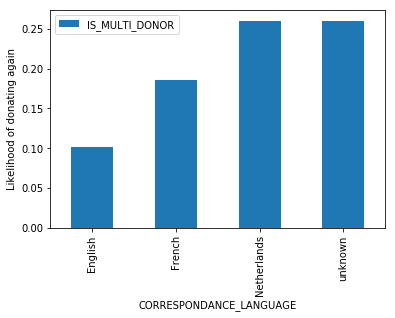

In [13]:
df = feature_data[['PARTNER','IS_MULTI_DONOR']]
df = pd.merge(df,but000[['PARTNER','LANGU_CORR']],on='PARTNER',how='inner')
df['CORRESPONDANCE_LANGUAGE'] = df['LANGU_CORR'].replace('E','English').replace('F','French').replace('N','Netherlands').fillna('unknown')
print(df['CORRESPONDANCE_LANGUAGE'].value_counts())
per_org_pivot = df.pivot_table(index="CORRESPONDANCE_LANGUAGE",values="IS_MULTI_DONOR")
per_org_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

## First Donation Properties

### Age Category at the time of First Donation

(Unknown)          45844
(25 to 49 Yrs)      5222
(50 to 74 Yrs)      4788
(74 to 100 Yrs)      637
(0 to 24 Yrs)        406
Name: AGE_CATEGORY_AT_FIRST_DONATION, dtype: int64


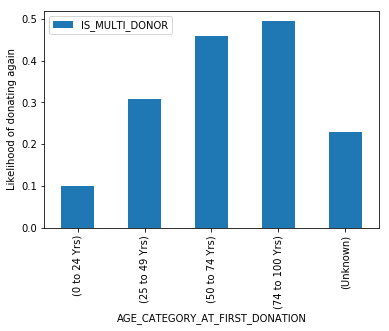

In [14]:
df = feature_data[['PARTNER','ISK_AGE_FD_CAT1','ISK_AGE_FD_CAT2','ISK_AGE_FD_CAT3','ISK_AGE_FD_CAT4','ISK_AGE_FD_CATU',
                'IS_MULTI_DONOR']]
age_cat_cols = ['ISK_AGE_FD_CAT1','ISK_AGE_FD_CAT2','ISK_AGE_FD_CAT3','ISK_AGE_FD_CAT4','ISK_AGE_FD_CATU']
df[age_cat_cols] = df[age_cat_cols].astype(str)
df['ISK_AGE_FD_CAT1'] = df['ISK_AGE_FD_CAT1'].replace('1','(0 to 24 Yrs)').replace('0','')
df['ISK_AGE_FD_CAT2'] = df['ISK_AGE_FD_CAT2'].replace('1','(25 to 49 Yrs)').replace('0','')
df['ISK_AGE_FD_CAT3'] = df['ISK_AGE_FD_CAT3'].replace('1','(50 to 74 Yrs)').replace('0','')
df['ISK_AGE_FD_CAT4'] = df['ISK_AGE_FD_CAT4'].replace('1','(74 to 100 Yrs)').replace('0','')
df['ISK_AGE_FD_CATU'] = df['ISK_AGE_FD_CATU'].replace('1','(Unknown)').replace('0','')
df['AGE_CATEGORY_AT_FIRST_DONATION'] = df[age_cat_cols].sum(axis=1)
print(df['AGE_CATEGORY_AT_FIRST_DONATION'].value_counts())
fd_shared_pivot = df.pivot_table(index="AGE_CATEGORY_AT_FIRST_DONATION",values="IS_MULTI_DONOR")
fd_shared_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

If we know the age of the donor when the donor first made a donation is above 50, then it is a good change that the donor would donate again.

### Donation Category of First Donation

CAT1    55191
CAT2      938
CAT3      468
CAT6      109
CAT5      102
CAT4       89
Name: FIRST_DONATION_CAT, dtype: int64


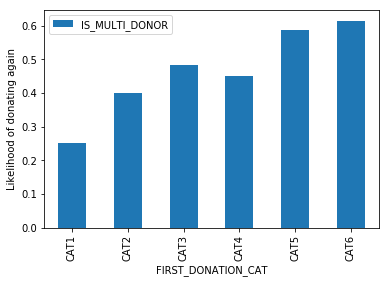

In [15]:
df = feature_data[['PARTNER','ISK_FD_CAT_1','ISK_FD_CAT_2','ISK_FD_CAT_3','ISK_FD_CAT_4','ISK_FD_CAT_5','ISK_FD_CAT_6',
                'IS_MULTI_DONOR']]
cat_cols = ['ISK_FD_CAT_1','ISK_FD_CAT_2','ISK_FD_CAT_3','ISK_FD_CAT_4','ISK_FD_CAT_5','ISK_FD_CAT_6']
df[cat_cols] = df[cat_cols].astype(str)
df['ISK_FD_CAT_1'] = df['ISK_FD_CAT_1'].replace('1','CAT1').replace('0','')
df['ISK_FD_CAT_2'] = df['ISK_FD_CAT_2'].replace('1','CAT2').replace('0','')
df['ISK_FD_CAT_3'] = df['ISK_FD_CAT_3'].replace('1','CAT3').replace('0','')
df['ISK_FD_CAT_4'] = df['ISK_FD_CAT_4'].replace('1','CAT4').replace('0','')
df['ISK_FD_CAT_5'] = df['ISK_FD_CAT_5'].replace('1','CAT5').replace('0','')
df['ISK_FD_CAT_6'] = df['ISK_FD_CAT_6'].replace('1','CAT6').replace('0','')
df['FIRST_DONATION_CAT'] = df[cat_cols].sum(axis=1)
print(df['FIRST_DONATION_CAT'].value_counts())
cat_pivot = df.pivot_table(index="FIRST_DONATION_CAT",values="IS_MULTI_DONOR")
cat_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

In general if the first donation of the donor is above 1,250 Euro (CAT 1), then it is a good chance that the donor would donate again.

### Number of days of sending thank you letter

3 Months     13738
4 Months     12240
2 Months     10343
5 Months      5893
> 1 Year      4742
6 Months      2873
1 Month       2158
7 Months      1382
8 Months       950
9 Months       918
10 Months      702
12 Months      497
11 Months      461
Name: NUM_DAYS_THANK_YOU_LETTER, dtype: int64


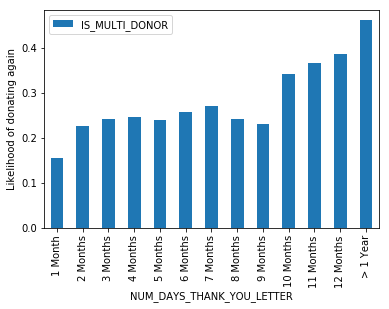

In [16]:
df = feature_data[['PARTNER','NUM_D_TYL','IS_MULTI_DONOR']]
time_bin = [0,31,60,91,122,152,183,213,243,274,304,335,365,df['NUM_D_TYL'].max()]
time_labels = ['1 Month','2 Months','3 Months','4 Months','5 Months','6 Months','7 Months','8 Months','9 Months','10 Months'
              ,'11 Months','12 Months','> 1 Year']
df['NUM_DAYS_THANK_YOU_LETTER'] = pd.cut(df['NUM_D_TYL'],time_bin,labels=time_labels,include_lowest=True)
print(df['NUM_DAYS_THANK_YOU_LETTER'].value_counts())
num_d_tyl_pivot = df.pivot_table(index="NUM_DAYS_THANK_YOU_LETTER",values="IS_MULTI_DONOR")
num_d_tyl_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

There seems to be no correlation between the number of days of sending thank you letter and being a Multi-donor. <br>
In fact, if the LUF <i>delayed</i> sending the thank you letter <b>(>= 10 months from receiving donation)</b> it is more likely that the donor would donate to LUF again!

### Is first donation shared or not

Not-shared    30391
Shared        26506
Name: IS_FIRST_DONATION_SHARED, dtype: int64


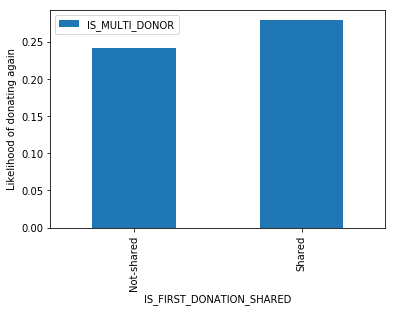

In [17]:
df = feature_data[['PARTNER','ISK_FD_SHARED','IS_MULTI_DONOR']]
df['ISK_FD_SHARED'] = df['ISK_FD_SHARED'].astype(str)
df['ISK_FD_SHARED'] = df['ISK_FD_SHARED'].replace('1','Shared').replace('0','Not-shared')
df['IS_FIRST_DONATION_SHARED'] = df['ISK_FD_SHARED']
print(df['IS_FIRST_DONATION_SHARED'].value_counts())
fd_shared_pivot = df.pivot_table(index="IS_FIRST_DONATION_SHARED",values="IS_MULTI_DONOR")
fd_shared_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

If the first donation of a donor (donor A) is shared with another person (donor B) who may or may not have donated to LUF before, then it is more likely that donor A would turn out to be a Multi-donor than if the donor had donated individually.

### Gift category of first donation

Funds            42329
Other Credits    13762
Chairs             806
Name: FIRST_DONATION_CREDIT_CATEGORY, dtype: int64


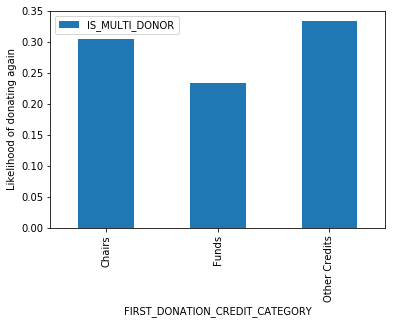

In [18]:
df = feature_data[['PARTNER','ISK_CC_FD_F','ISK_CC_FD_CH','ISK_CC_FD_OC','IS_MULTI_DONOR']]
gift_cat_cols = ['ISK_CC_FD_F','ISK_CC_FD_CH','ISK_CC_FD_OC']
df[gift_cat_cols] = df[gift_cat_cols].astype(str)
df['ISK_CC_FD_F'] = df['ISK_CC_FD_F'].replace('1','Funds').replace('0','')
df['ISK_CC_FD_CH'] = df['ISK_CC_FD_CH'].replace('1','Chairs').replace('0','')
df['ISK_CC_FD_OC'] = df['ISK_CC_FD_OC'].replace('1','Other Credits').replace('0','')
df['FIRST_DONATION_CREDIT_CATEGORY'] = df[gift_cat_cols].sum(axis=1)
print(df['FIRST_DONATION_CREDIT_CATEGORY'].value_counts())
fd_cc_pivot = df.pivot_table(index="FIRST_DONATION_CREDIT_CATEGORY",values="IS_MULTI_DONOR")
fd_cc_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

Clearly if a donor first donates to <b>Other Credits</b>, then the donor is more likely to donate to LUF again than if the donor had first donated to Funds or Other Chairs.

### Year of first donation

2014    6411
2017    6232
2012    5421
2015    4752
2018    4459
2013    3878
2011    3654
2016    3623
2008    3334
2010    2653
2007    2433
2009    2194
2004    1813
2005    1673
2002    1672
2006    1386
2003    1309
Name: YEAR_OF_FIRST_DONATION, dtype: int64


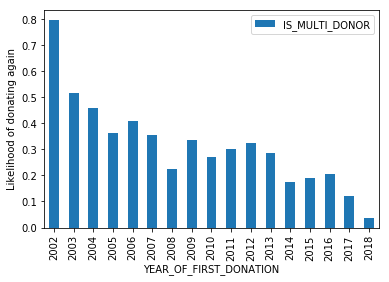

In [19]:
df = feature_data[['PARTNER','ZLUF_DOCDATE','IS_MULTI_DONOR']]
df['ZLUF_DOCDATE'] = pd.to_datetime(df['ZLUF_DOCDATE'])
df['YEAR_OF_FIRST_DONATION'] = df['ZLUF_DOCDATE'].dt.year
print(df['YEAR_OF_FIRST_DONATION'].value_counts())
year_pivot = df.pivot_table(index="YEAR_OF_FIRST_DONATION",values="IS_MULTI_DONOR")
year_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

The general trend of LUF getting new donors who turn out to be Multi-donors is decreasing every year.

### Month of first donation

9     7658
8     6461
12    6126
10    5910
6     4608
7     4488
5     3950
4     3840
3     3755
11    3616
1     3311
2     3174
Name: MONTH_OF_FIRST_DONATION, dtype: int64


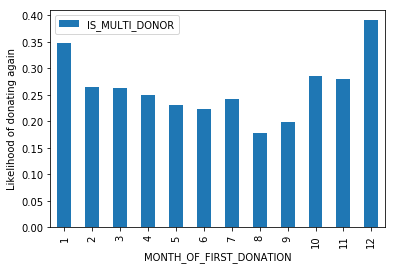

In [20]:
df = feature_data[['PARTNER','ZLUF_DOCDATE','IS_MULTI_DONOR']]
df['ZLUF_DOCDATE'] = pd.to_datetime(df['ZLUF_DOCDATE'])
df['MONTH_OF_FIRST_DONATION'] = df['ZLUF_DOCDATE'].dt.month
print(df['MONTH_OF_FIRST_DONATION'].value_counts())
month_pivot = df.pivot_table(index="MONTH_OF_FIRST_DONATION",values="IS_MULTI_DONOR")
month_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

Interestingly, if a donor first donates in the month of <b>December</b> or <b>January</b>, then it is more likely that the donor will turn out to be Multi-donor in the future. Why? <br>

Also donors who first donated in the month of <b>August</b> tend to not donate to LUF again. Why?

### Weekday of first donation

Tuesday      14667
Monday       14161
Wednesday    10056
Thursday      9088
Friday        8894
Saturday        29
Sunday           2
Name: WEEKDAY_OF_FIRST_DONATION, dtype: int64


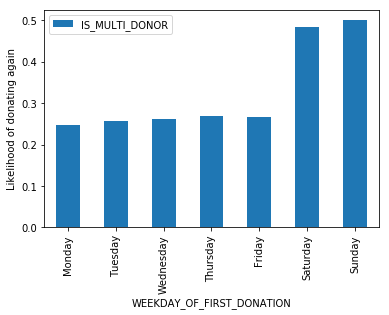

In [21]:
df = feature_data[['PARTNER','ZLUF_DOCDATE','IS_MULTI_DONOR']]
df['ZLUF_DOCDATE'] = pd.to_datetime(df['ZLUF_DOCDATE'])
df['WEEKDAY_OF_FIRST_DONATION'] = df['ZLUF_DOCDATE'].dt.weekday
df['WEEKDAY_OF_FIRST_DONATION'] = df['WEEKDAY_OF_FIRST_DONATION'].astype(str).replace('0','Monday').replace(
    '1','Tuesday').replace('2','Wednesday').replace('3','Thursday').replace('4','Friday').replace(
    '5','Saturday').replace('6','Sunday')
print(df['WEEKDAY_OF_FIRST_DONATION'].value_counts())
month_pivot = df.pivot_table(index="WEEKDAY_OF_FIRST_DONATION",values="IS_MULTI_DONOR")
proper_index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
month_pivot = month_pivot.reindex(proper_index)
month_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

There seems to be not much correlation between the first donation of donors and the weekday of their first donation. <br>
There are two high bars on Saturday and Sunday but the number of donors who first donated on these days are very very few.

### Availability of VGS

Not-present    45568
Present        11329
Name: IS_VGS_INFO_AVAILABLE, dtype: int64


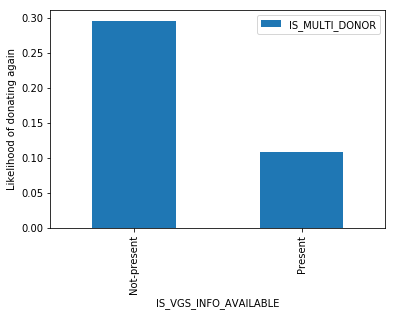

In [22]:
df = feature_data[['PARTNER','ISK_FD_VGS','IS_MULTI_DONOR']]
df['ISK_FD_VGS'] = df['ISK_FD_VGS'].astype(str)
df['ISK_FD_VGS'] = df['ISK_FD_VGS'].replace('1','Present').replace('0','Not-present')
df['IS_VGS_INFO_AVAILABLE'] = df['ISK_FD_VGS']
print(df['IS_VGS_INFO_AVAILABLE'].value_counts())
fd_shared_pivot = df.pivot_table(index="IS_VGS_INFO_AVAILABLE",values="IS_MULTI_DONOR")
fd_shared_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show() 

Why does the presence of structured information in the first donation of a donors leads to less liklihood of the donor donating to LUF again?

### Availability of bank account number

Present        36664
Not-present    20233
Name: IS_ACC_NO_INFO_AVAILABLE, dtype: int64


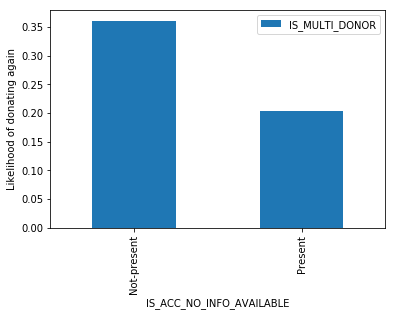

In [23]:
df = feature_data[['PARTNER','ISK_FD_BANKN','IS_MULTI_DONOR']]
df['ISK_FD_BANKN'] = df['ISK_FD_BANKN'].astype(str)
df['ISK_FD_BANKN'] = df['ISK_FD_BANKN'].replace('1','Present').replace('0','Not-present')
df['IS_ACC_NO_INFO_AVAILABLE'] = df['ISK_FD_BANKN']
print(df['IS_ACC_NO_INFO_AVAILABLE'].value_counts())
fd_shared_pivot = df.pivot_table(index="IS_ACC_NO_INFO_AVAILABLE",values="IS_MULTI_DONOR")
fd_shared_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show() 

### Tax Eligibility

Eligible        55484
Not-eligible     1413
Name: IS_DONATION_TAX_ELIGIBLE, dtype: int64


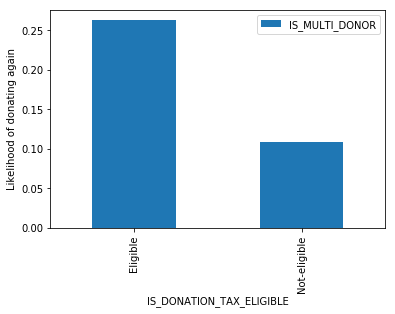

In [24]:
df = feature_data[['PARTNER','ISK_FD_TAX_NE','IS_MULTI_DONOR']]
df['ISK_FD_TAX_NE'] = df['ISK_FD_TAX_NE'].astype(str)
df['ISK_FD_TAX_NE'] = df['ISK_FD_TAX_NE'].replace('1','Not-eligible').replace('0','Eligible')
df['IS_DONATION_TAX_ELIGIBLE'] = df['ISK_FD_TAX_NE']
print(df['IS_DONATION_TAX_ELIGIBLE'].value_counts())
fd_shared_pivot = df.pivot_table(index="IS_DONATION_TAX_ELIGIBLE",values="IS_MULTI_DONOR")
fd_shared_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

This is somewhat expected. If the credit is tax eligible then the donors would tend to donate to LUF again.

### Is Thank You Letter Needed

Needed        56427
Not-needed      470
Name: IS_THANK_YOU_LETTER_NEEDED, dtype: int64


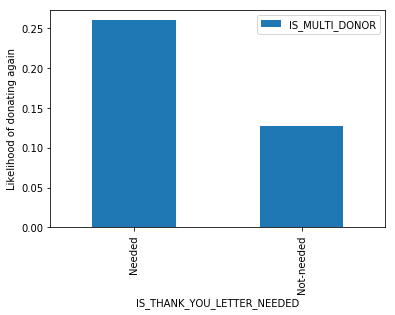

In [25]:
df = feature_data[['PARTNER','ISK_FD_TYL_NN','IS_MULTI_DONOR']]
df['ISK_FD_TYL_NN'] = df['ISK_FD_TYL_NN'].astype(str)
df['ISK_FD_TYL_NN'] = df['ISK_FD_TYL_NN'].replace('1','Not-needed').replace('0','Needed')
df['IS_THANK_YOU_LETTER_NEEDED'] = df['ISK_FD_TYL_NN']
print(df['IS_THANK_YOU_LETTER_NEEDED'].value_counts())
fd_shared_pivot = df.pivot_table(index="IS_THANK_YOU_LETTER_NEEDED",values="IS_MULTI_DONOR")
fd_shared_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

# PARTNER Relations

### Partner Relationship/ Partnerrelatie (BUR998)

None    29476
1       27369
2          52
Name: PARTNER_RELATIONSHIP, dtype: int64


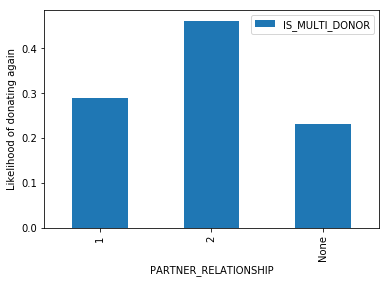

In [27]:
df = feature_data[['PARTNER','REL_BUR998','IS_MULTI_DONOR']]
df['REL_BUR998'] = df['REL_BUR998'].astype(str)
df['REL_BUR998'] = df['REL_BUR998'].replace('0','None')
df['PARTNER_RELATIONSHIP'] = df['REL_BUR998']
print(df['PARTNER_RELATIONSHIP'].value_counts())
bur998_pivot = df.pivot_table(index="PARTNER_RELATIONSHIP",values="IS_MULTI_DONOR")
bur998_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

If the donor has a relationship with a person and if this person is a business partner to LUF, then it is slightly more likely that the donor would donate to LUF again.

### Partner member of Alumni Circle/ Alumnus van Kring (Z00001)

None    46389
1        5946
2        3374
3         838
4         256
5          54
>5         40
Name: MEMBER_OF_ALUMNI_CIRCLE, dtype: int64


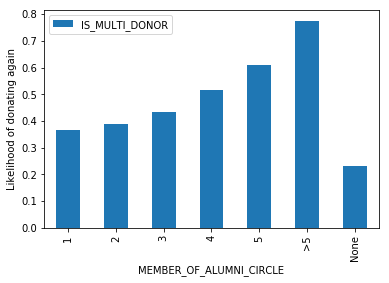

In [28]:
df = feature_data[['PARTNER','REL_Z00001','IS_MULTI_DONOR']]
df['REL_Z00001'] = df['REL_Z00001'].replace([6+i for i in range(10)],6)
df['REL_Z00001'] = df['REL_Z00001'].astype(str)
df['REL_Z00001'] = df['REL_Z00001'].replace('0','None').replace('6','>5')
df['MEMBER_OF_ALUMNI_CIRCLE'] = df['REL_Z00001']
print(df['MEMBER_OF_ALUMNI_CIRCLE'].value_counts())
z00001_pivot = df.pivot_table(index="MEMBER_OF_ALUMNI_CIRCLE",values="IS_MULTI_DONOR")
z00001_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

More the number of alumni circles a donor is part of, the more likely the donor would donate to LUF again.

### Contact Person of an Organization (BUT051 Table)

None    50545
1        5504
2         666
3          86
>5         52
4          34
5          10
Name: CONTACT_PERSON_OF_ORG, dtype: int64


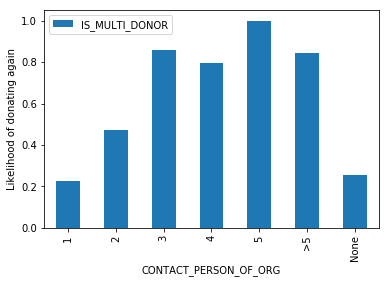

In [29]:
df = feature_data[['PARTNER','REL_ORGCP','IS_MULTI_DONOR']]
df['REL_ORGCP'] = df['REL_ORGCP'].replace([6+i for i in range(50)],6)
df['REL_ORGCP'] = df['REL_ORGCP'].astype(str)
df['REL_ORGCP'] = df['REL_ORGCP'].replace('0','None').replace('6','>5')
df['CONTACT_PERSON_OF_ORG'] = df['REL_ORGCP']
print(df['CONTACT_PERSON_OF_ORG'].value_counts())
orgcp_pivot = df.pivot_table(index="CONTACT_PERSON_OF_ORG",values="IS_MULTI_DONOR")
orgcp_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

If a donor is a contact person for 2 or more organizations then the likelihood of this donor donating to LUF again would be very high.

### Parent-Child Relationship/ Ouder-kindrelatie (BUR021)

Unknown    55841
1            668
2            276
>2           112
Name: PARTNER_HAS_CHILD, dtype: int64


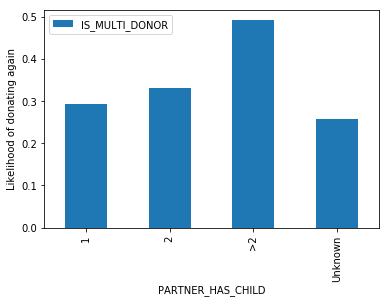

In [30]:
df = feature_data[['PARTNER','REL_BUR021','IS_MULTI_DONOR']]
df['REL_BUR021'] = df['REL_BUR021'].replace([3+i for i in range(50)],3)
df['REL_BUR021'] = df['REL_BUR021'].astype(str)
df['REL_BUR021'] = df['REL_BUR021'].replace('0','Unknown').replace('3','>2')
df['PARTNER_HAS_CHILD'] = df['REL_BUR021']
print(df['PARTNER_HAS_CHILD'].value_counts())
bur021_pivot = df.pivot_table(index="PARTNER_HAS_CHILD",values="IS_MULTI_DONOR")
bur021_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

If the donor has more than two children who are also a business partner to the LUF, then this donor is much more likely to donate to LUF again.

### Brother/Sister Relationship/ Broer/zus relatie (Z00018)

Unknown    56839
1             44
3             10
2              4
Name: PARTNER_HAS_SIBLINGS, dtype: int64


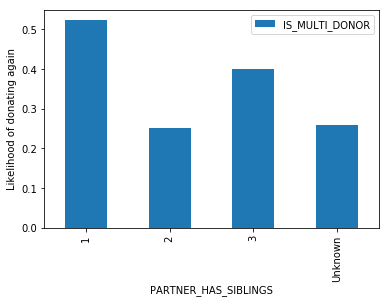

In [31]:
df = feature_data[['PARTNER','REL_Z00018','IS_MULTI_DONOR']]
#df['REL_Z00018'] = df['REL_Z00018'].replace([3+i for i in range(50)],3)
df['REL_Z00018'] = df['REL_Z00018'].astype(str)
df['REL_Z00018'] = df['REL_Z00018'].replace('0','Unknown')
df['PARTNER_HAS_SIBLINGS'] = df['REL_Z00018']
print(df['PARTNER_HAS_SIBLINGS'].value_counts())
z00018_pivot = df.pivot_table(index="PARTNER_HAS_SIBLINGS",values="IS_MULTI_DONOR")
z00018_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

Not enough data to reach a solid conclusion.

### Responsible Employee/ Verantw. medewerker (BUR011)

No     56754
Yes      143
Name: RESPONSIBLE_EMPLOYEE, dtype: int64


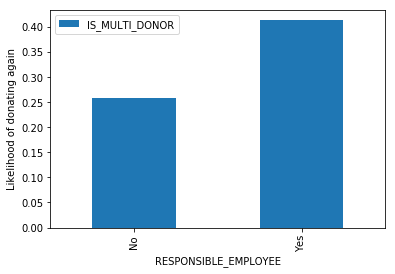

In [32]:
df = feature_data[['PARTNER','REL_BUR011','IS_MULTI_DONOR']]
df['REL_BUR011'] = df['REL_BUR011'].astype(str)
df['REL_BUR011'] = df['REL_BUR011'].replace('1','Yes').replace('0','No')
df['RESPONSIBLE_EMPLOYEE'] = df['REL_BUR011']
print(df['RESPONSIBLE_EMPLOYEE'].value_counts())
bur011_pivot = df.pivot_table(index="RESPONSIBLE_EMPLOYEE",values="IS_MULTI_DONOR")
bur011_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()

Responsible employees are more likely to donate again to LUF.

# Marketing Attributes

In [33]:
#Get the required data
ma_melted = pd.read_csv('SQLDATA/PYTHON_OUTPUTS/ma_melted.csv') #Contains PARTNER, ATNAM & ATZHL values
ma_melted = ma_melted.drop(['Unnamed: 0'],axis=1)
print(ma_melted.shape)
to_drop_atnams = ['ZLUF_AANTAL_KINDEREN','ZLUF_GEZINSSAMENSTELLING','ZLUF_COMM_CAMPAGNE','ZLUF_COMM_DANKBRIEF',
                  'ZLUF_COMM_FISCAALATTEST','ZLUF_COMM_JAARVERSLAG','ZLUF_COMM_KERSTKAART','ZLUF_COMM_MAILINGS',
                  'ZLUF_COMM_NB','ZLUF_COMM_ALG','ZLUF_COMM_EVENEMENT','ZLUF_COMM_VERJAARDAG','ZLUF_RECURRENT','ZLUF_RELIGIE',
                  'ZLUF_ADEL','ZLUF_ORG_SECTOR','ZLUF_VGS','ZLUF_SL_HS','ZLUF_SL_SCIENCE','ZLUF_SL_ZJDV','ZLUF_SL_KULAK',
                  'ZLUF_SL_RD']
ma_melted = ma_melted[~ma_melted['ATNAM'].isin(to_drop_atnams)] #Remove these specified columns as they contains majority of unknowns
ma_melted.reset_index(drop=True,inplace=True)
print(ma_melted.shape) 
ma_data = pd.merge(feature_data[['PARTNER']],ma_melted,on='PARTNER',how='inner')
print(len(set(ma_data['PARTNER']))) 
print(ma_data['ATNAM'].value_counts())
ma_data.head()

(1577172, 3)
(212196, 3)
56868
ZLUF_AMBT               51150
ZLUF_KERKELIJK          50074
ZLUF_INTERESSELEGAAT    50074
ZLUF_ORG_VERENIGING      6895
ZLUF_ORG_ALS_PERSOON     6791
ZLUF_SCHENKINTERESSE      985
ZLUF_LIJST                414
ZLUF_CAMPAGNE             234
Name: ATNAM, dtype: int64


,PARTNER,ATNAM,ATZHL
0,200000002,ZLUF_ORG_VERENIGING,1
1,200000002,ZLUF_ORG_ALS_PERSOON,1
2,200000007,ZLUF_ORG_VERENIGING,1
3,200000007,ZLUF_ORG_ALS_PERSOON,1
4,200000010,ZLUF_ORG_VERENIGING,1


### ZLUF_AMBT: Titulatuur - Ambtelijk (Official Title)

No Official Title    50009
Unknown               6821
Doctor                 949
Master (lawyer)        137
Notary                  40
Other Titles            15
Name: OFFICIAL_TITLE, dtype: int64


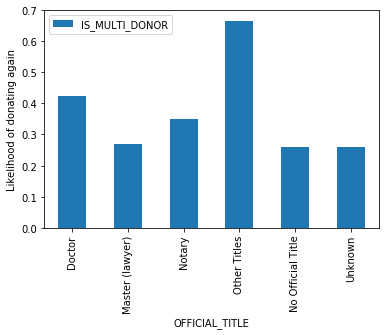

In [34]:
df = ma_data[ma_data['ATNAM']=='ZLUF_AMBT']
df = pd.merge(df,feature_data[['PARTNER','IS_MULTI_DONOR']],on='PARTNER',how='right').fillna(0)
df['ATZHL'] = df['ATZHL'].astype(int).astype(str)
df.reset_index(drop=True,inplace=True)
df['OFFICIAL_TITLE'] = df['ATZHL'].replace('0','Unknown').replace('1','No Official Title').replace(
    '9','Doctor').replace('5','Master (lawyer)').replace('2','Notary').replace(['7','4','10','16'],'Other Titles')
print(df['OFFICIAL_TITLE'].value_counts())
ambt_pivot = df.pivot_table(index="OFFICIAL_TITLE",values="IS_MULTI_DONOR")
ambt_pivot = ambt_pivot.reindex(['Doctor','Master (lawyer)','Notary','Other Titles','No Official Title','Unknown'])
ambt_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show()  
#Other Titles consists of Vicerector, Dean, Minister, and Rector
#Unknown means the data for a particular Partner is not present in Marketing Attribute table
#No Official Title means data is present in Marketing Attribute table, but it is marked as No title

If the donor is found to have the title of a Doctor, then the donor is more likely to donate to LUF again when compared to other donors who don't have any official title.

### ZLUF_KERKELIJK: Titulatuur - Kerkelijk (Title - Church)

No Church Title           50043
Unknown                    6823
Priest                       10
Sister                        9
Father                        8
Archbishop - Monsignor        3
Cardinal                      1
Name: CHURCH_TITLE, dtype: int64


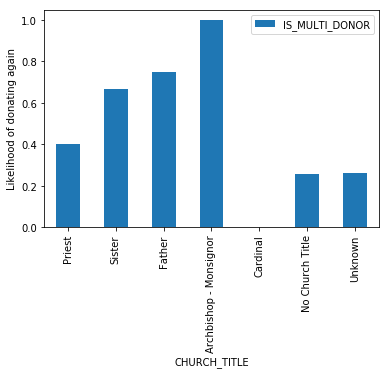

In [35]:
df = ma_data[ma_data['ATNAM']=='ZLUF_KERKELIJK']
df = pd.merge(df,feature_data[['PARTNER','IS_MULTI_DONOR']],on='PARTNER',how='right').fillna(0)
df['ATZHL'] = df['ATZHL'].astype(int).astype(str)
df.reset_index(drop=True,inplace=True)
df['CHURCH_TITLE'] = df['ATZHL'].replace('0','Unknown').replace('1','No Church Title').replace('9','Priest').replace(
    '11','Sister').replace('8','Father').replace('2','Archbishop - Monsignor').replace('19','Cardinal')
print(df['CHURCH_TITLE'].value_counts())
kerk_pivot = df.pivot_table(index="CHURCH_TITLE",values="IS_MULTI_DONOR")
kerk_pivot = kerk_pivot.reindex(['Priest','Sister','Father','Archbishop - Monsignor','Cardinal','No Church Title','Unknown'])
kerk_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show() 

Not enough data to obtain a solid conclusion.

### ZLUF_INTERESSELEGAAT: Interesse legaat (Interest bequest)

No Interest                       49963
Unknown                            6823
Yes, via Testament.be                63
Yes, contacted LUF                   34
Yes, via notary                      11
Yes, via Family, Prof, Friends        3
Name: INTEREST, dtype: int64


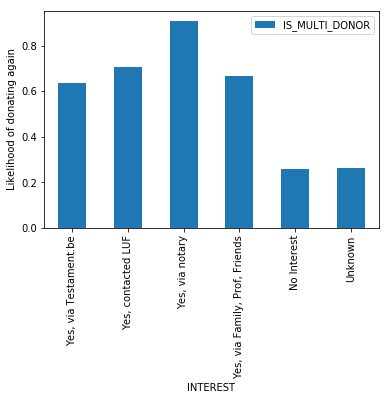

In [36]:
df = ma_data[ma_data['ATNAM']=='ZLUF_INTERESSELEGAAT']
df = pd.merge(df,feature_data[['PARTNER','IS_MULTI_DONOR']],on='PARTNER',how='right').fillna(0)
df['ATZHL'] = df['ATZHL'].astype(int).astype(str)
df.reset_index(drop=True,inplace=True)
df['INTEREST'] = df['ATZHL'].replace('0','Unknown').replace('1','No Interest').replace('3','Yes, via Testament.be').replace(
    '4','Yes, contacted LUF').replace('2','Yes, via notary').replace('5','Yes, via Family, Prof, Friends')
print(df['INTEREST'].value_counts())
interest_pivot = df.pivot_table(index="INTEREST",values="IS_MULTI_DONOR")
interest_pivot = interest_pivot.reindex(['Yes, via Testament.be','Yes, contacted LUF','Yes, via notary',
                                         'Yes, via Family, Prof, Friends','No Interest','Unknown'])
interest_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show() 

### ZLUF_ORG_VERENIGING: Soort Vereniging (Association type)

Unknown           50105
No Association     6782
Service Club        106
Others                7
Name: ASSOCIATION_TYPE, dtype: int64


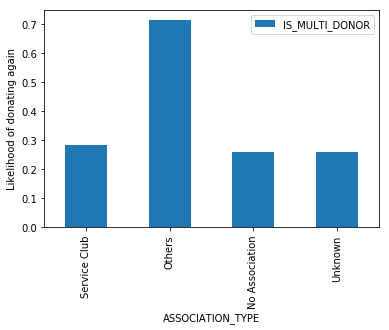

In [37]:
df = ma_data[ma_data['ATNAM']=='ZLUF_ORG_VERENIGING']
df = pd.merge(df,feature_data[['PARTNER','IS_MULTI_DONOR']],on='PARTNER',how='right').fillna(0)
df['ATZHL'] = df['ATZHL'].astype(int).astype(str)
df.reset_index(drop=True,inplace=True)
df['ASSOCIATION_TYPE'] = df['ATZHL'].replace('0','Unknown').replace('1','No Association').replace(
    '7','Service Club').replace(['10','13','8','2'],'Others')
print(df['ASSOCIATION_TYPE'].value_counts())
ass_pivot = df.pivot_table(index="ASSOCIATION_TYPE",values="IS_MULTI_DONOR")
ass_pivot = ass_pivot.reindex(['Service Club','Others','No Association','Unknown'])
ass_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show() 
#Others (association) include Religieuze vereniging, Vrouwenvereniging, Leefmilieuvereniging, Beroepsvereninging

Not enough data to obtain a solid conclusion.

### ZLUF_ORG_ALS_PERSOON: Bedrijf beschouwen als persoon (Consider company as a person)

Unknown    50106
No          6712
Yes           79
Name: CONSIDER_COMPANY_AS_PERSON, dtype: int64


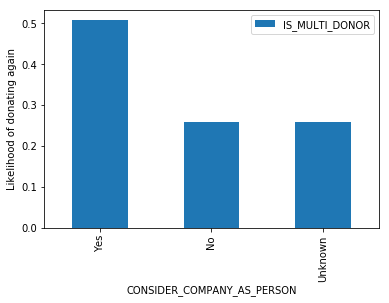

In [38]:
df = ma_data[ma_data['ATNAM']=='ZLUF_ORG_ALS_PERSOON']
df = pd.merge(df,feature_data[['PARTNER','IS_MULTI_DONOR']],on='PARTNER',how='right').fillna(0)
df['ATZHL'] = df['ATZHL'].astype(int).astype(str)
df.reset_index(drop=True,inplace=True)
df['CONSIDER_COMPANY_AS_PERSON'] = df['ATZHL'].replace('0','Unknown').replace('1','No').replace('2','Yes')
print(df['CONSIDER_COMPANY_AS_PERSON'].value_counts())
comp_as_person_pivot = df.pivot_table(index="CONSIDER_COMPANY_AS_PERSON",values="IS_MULTI_DONOR")
comp_as_person_pivot = comp_as_person_pivot.reindex(['Yes','No','Unknown'])
comp_as_person_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show() 

### ZLUF_SCHENKINTERESSE: Interesse om te geven aan (Interest to indicate)

Unknown                    56511
Art & Culture                256
Healthcare                   235
Heritage                     182
Projects for children        117
Development cooperation      109
Scholarships                  85
Social services                1
Name: INTEREST_IN_CAUSE, dtype: int64


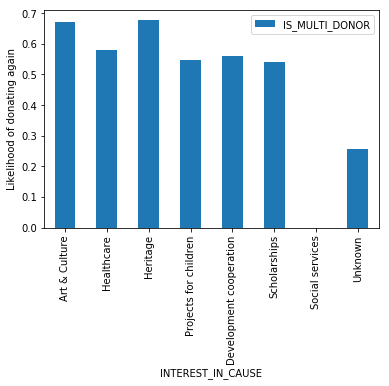

In [39]:
df = ma_data[ma_data['ATNAM']=='ZLUF_SCHENKINTERESSE']
df = pd.merge(df,feature_data[['PARTNER','IS_MULTI_DONOR']],on='PARTNER',how='right').fillna(0)
df['ATZHL'] = df['ATZHL'].astype(int).astype(str)
df.reset_index(drop=True,inplace=True)
df['INTEREST_IN_CAUSE'] = df['ATZHL'].replace('0','Unknown').replace('1','Healthcare').replace('12','Art & Culture').replace(
    '6','Heritage').replace('4','Projects for children').replace('7','Development cooperation').replace(
    '5','Scholarships').replace('10','Social services')
print(df['INTEREST_IN_CAUSE'].value_counts())
int_pivot = df.pivot_table(index="INTEREST_IN_CAUSE",values="IS_MULTI_DONOR")
int_pivot = int_pivot.reindex(['Art & Culture','Healthcare','Heritage','Projects for children','Development cooperation',
                               'Scholarships','Social services','Unknown'])
int_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show() 

In general, donor who has expressed their interest in donating to cause are more likely to donate to LUF again.

### ZLUF_LIJST: Behoort tot lijst (Belongs to list)

Not in List                                             56581
Relationship IP                                            96
Alumni Lovanienses Board                                   58
Roger Dillemans Fund Friends                               53
Former member of the KU Leuven Association                 41
Former member of the KU Leuven Executive Board             35
Former member of the organizing body of KU Leuven          35
Academic Council KU Leuven                                 27
Organizing Government KU Leuven                            16
KU Leuven Executive Board                                  16
Executive Committee of Leuven University Fund - P&AD       14
Roger Dillemans Fundmates                                   9
Bursaal Fonds Roger Dillemans                               8
KU Leuven Association                                       6
Name: BELONGS_TO_LIST, dtype: int64


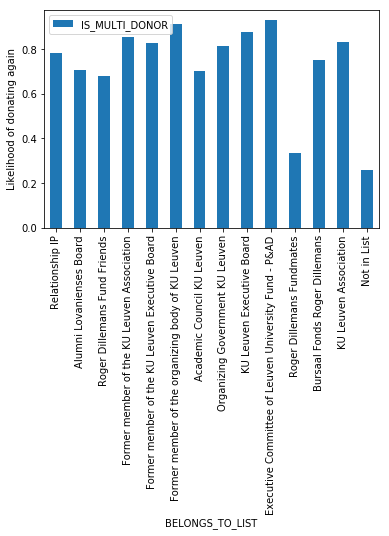

In [40]:
df = ma_data[ma_data['ATNAM']=='ZLUF_LIJST']
df = pd.merge(df,feature_data[['PARTNER','IS_MULTI_DONOR']],on='PARTNER',how='right').fillna(0)
df['ATZHL'] = df['ATZHL'].astype(int).astype(str)
df.reset_index(drop=True,inplace=True)
df['BELONGS_TO_LIST'] = df['ATZHL'].replace('0','Not in List').replace('2','Relationship IP').replace(
    '3','Alumni Lovanienses Board').replace('14','Roger Dillemans Fund Friends').replace(
    '9','Former member of the KU Leuven Association').replace(
    '11','Former member of the KU Leuven Executive Board').replace(
    '10','Former member of the organizing body of KU Leuven').replace('4','Academic Council KU Leuven').replace(
    '6','Organizing Government KU Leuven').replace('7','KU Leuven Executive Board').replace(
    '1','Executive Committee of Leuven University Fund - P&AD').replace('13','Roger Dillemans Fundmates').replace(
    '12','Bursaal Fonds Roger Dillemans').replace('5','KU Leuven Association')
print(df['BELONGS_TO_LIST'].value_counts())
list_pivot = df.pivot_table(index="BELONGS_TO_LIST",values="IS_MULTI_DONOR")
list_pivot = list_pivot.reindex(['Relationship IP','Alumni Lovanienses Board','Roger Dillemans Fund Friends',
                                 'Former member of the KU Leuven Association','Former member of the KU Leuven Executive Board',
                                 'Former member of the organizing body of KU Leuven','Academic Council KU Leuven',
                                 'Organizing Government KU Leuven','KU Leuven Executive Board',
                                 'Executive Committee of Leuven University Fund - P&AD','Roger Dillemans Fundmates',
                                 'Bursaal Fonds Roger Dillemans','KU Leuven Association','Not in List'])
list_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show() 

The results are not surprising. 

### ZLUF_CAMPAGNE: Campagne (Campaign)

Unknown                       56669
Campagne 1: Prospect            115
Campagne 1: Schenker             89
Campaign 1: Relationship         19
Campaign 1: Administration       11
Name: CAMPAIGN, dtype: int64


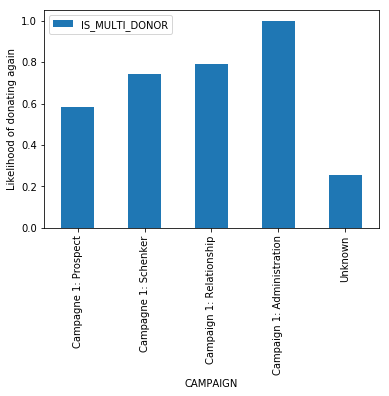

In [41]:
df = ma_data[ma_data['ATNAM']=='ZLUF_CAMPAGNE']
df = pd.merge(df,feature_data[['PARTNER','IS_MULTI_DONOR']],on='PARTNER',how='right').fillna(0)
df['ATZHL'] = df['ATZHL'].astype(int).astype(str)
df.reset_index(drop=True,inplace=True)
df['CAMPAIGN'] = df['ATZHL'].replace('0','Unknown').replace('3','Campagne 1: Prospect').replace(
    '7','Campagne 1: Schenker').replace('5','Campaign 1: Relationship').replace('1','Campaign 1: Administration')
print(df['CAMPAIGN'].value_counts())
campg_pivot = df.pivot_table(index="CAMPAIGN",values="IS_MULTI_DONOR")
campg_pivot = campg_pivot.reindex(['Campagne 1: Prospect','Campagne 1: Schenker','Campaign 1: Relationship',
                                   'Campaign 1: Administration','Unknown'])
campg_pivot.plot.bar()
plt.ylabel('Likelihood of donating again')
plt.show() 

Campaigning does help in getting some Multi-donors.